<a href="https://colab.research.google.com/github/CamillaSemenzzatt/PROJETO-APLICADO-III/blob/main/Idade_por_municipio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O Tabela_de_Idade.xlsx 'https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/d5ef7c87ce87c7bb970904c9511cc5079c0f5a95/tabela4094.xlsx'

tabela = pd.read_excel('Tabela_de_Idade.xlsx')

print(tabela)

--2025-03-23 16:03:07--  https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/d5ef7c87ce87c7bb970904c9511cc5079c0f5a95/tabela4094.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93768 (92K) [application/octet-stream]
Saving to: ‘Tabela_de_Idade.xlsx’

Tabela_de_Idade.xls 100%[===================>]  91.57K  --.-KB/s    in 0.02s   

2025-03-23 16:03:07 (3.87 MB/s) - ‘Tabela_de_Idade.xlsx’ saved [93768/93768]

     Tabela 4094 - Pessoas de 14 anos ou mais de idade, total, na força de trabalho, ocupadas, desocupadas, fora da força de trabalho, em situação de informalidade e respectivas taxas e níveis, por grupo de idade  \
0     Variável - Pessoas de 14 anos ou mais de idade...                                                             

In [3]:
tabela = tabela.drop([0, 1])
tabela = tabela.reset_index(drop=True)

tabela = tabela.rename(columns={
    'Tabela 4094 - Pessoas de 14 anos ou mais de idade, total, na força de trabalho, ocupadas, desocupadas, fora da força de trabalho, em situação de informalidade e respectivas taxas e níveis, por grupo de idade': 'municipio',
    'Unnamed: 1': 'trimestre',
    'Unnamed: 2': 'Grupo de Idade',
    'Unnamed: 3': 'quantidade'
})

ultima_palavra_valida = {coluna: None for coluna in tabela.columns}

for index, row in tabela.iterrows():
    for coluna in tabela.columns:
        if pd.isnull(row[coluna]):
            if ultima_palavra_valida[coluna] is not None:
                row[coluna] = ultima_palavra_valida[coluna]
        else:
            ultima_palavra_valida[coluna] = row[coluna]
            for outra_coluna in tabela.columns:
                if outra_coluna != coluna and pd.isnull(row[outra_coluna]):
                    ultima_palavra_valida[outra_coluna] = None

tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)

tabela = tabela.drop(tabela.index[-1])

<ipython-input-3-ddb2be650719>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)


In [4]:
from tabulate import tabulate

tabela_lista = tabela.values.tolist()

tabela_lista.insert(0, tabela.columns.tolist())

print(tabulate(tabela_lista, headers="firstrow", tablefmt="grid"))

+---------------------+-------------------+------------------+--------------+
| municipio           | trimestre         | Grupo de Idade   |   quantidade |
+=====================+===================+==================+==============+
| Porto Velho (RO)    | 1º trimestre 2012 | 14 a 17 anos     |           38 |
+---------------------+-------------------+------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | 18 a 24 anos     |           60 |
+---------------------+-------------------+------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | 25 a 39 anos     |          123 |
+---------------------+-------------------+------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | 40 a 59 anos     |           94 |
+---------------------+-------------------+------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | 60 anos ou mais  |           26 |
+---------------------+-------------------+------------------+--

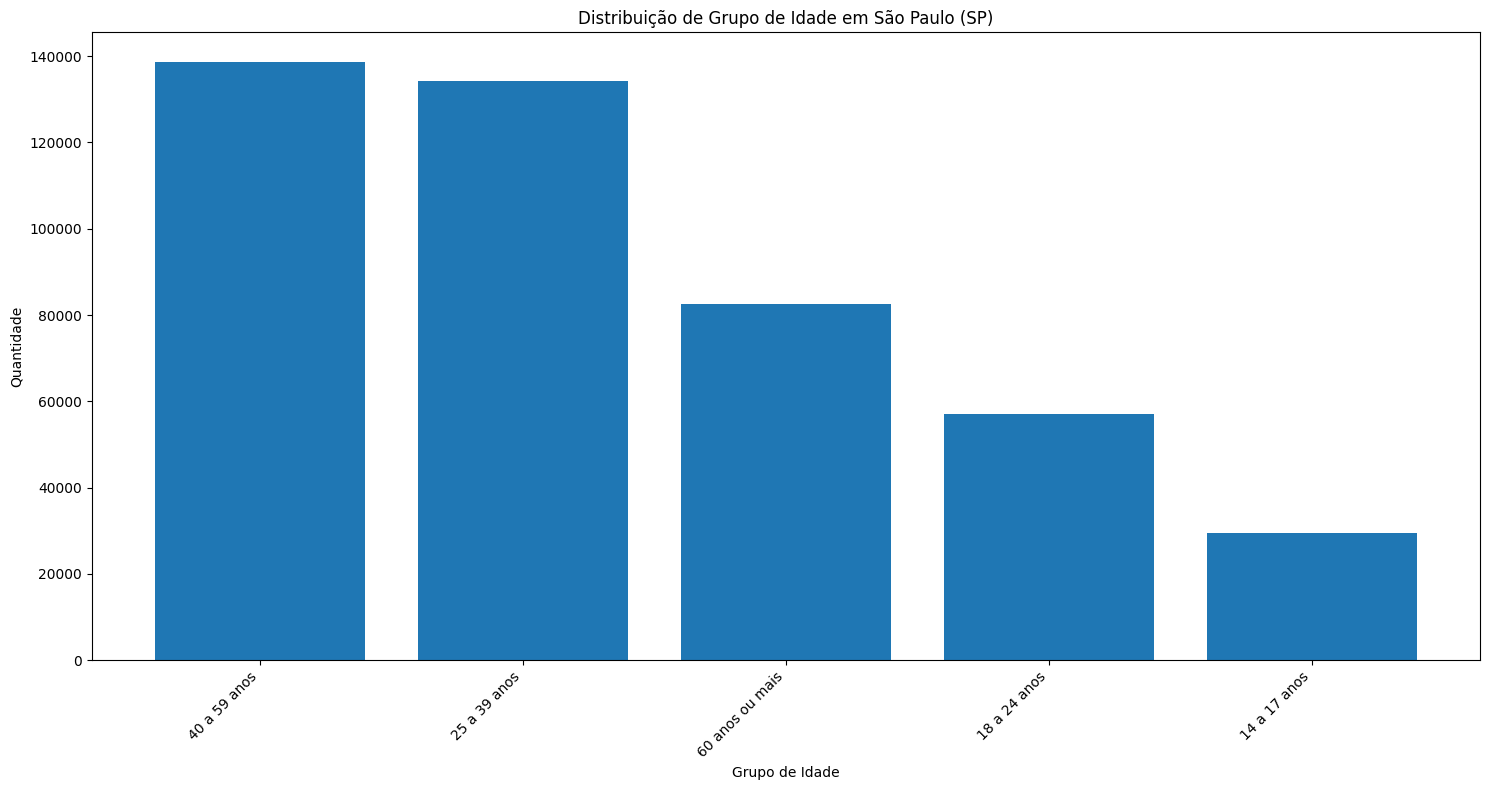

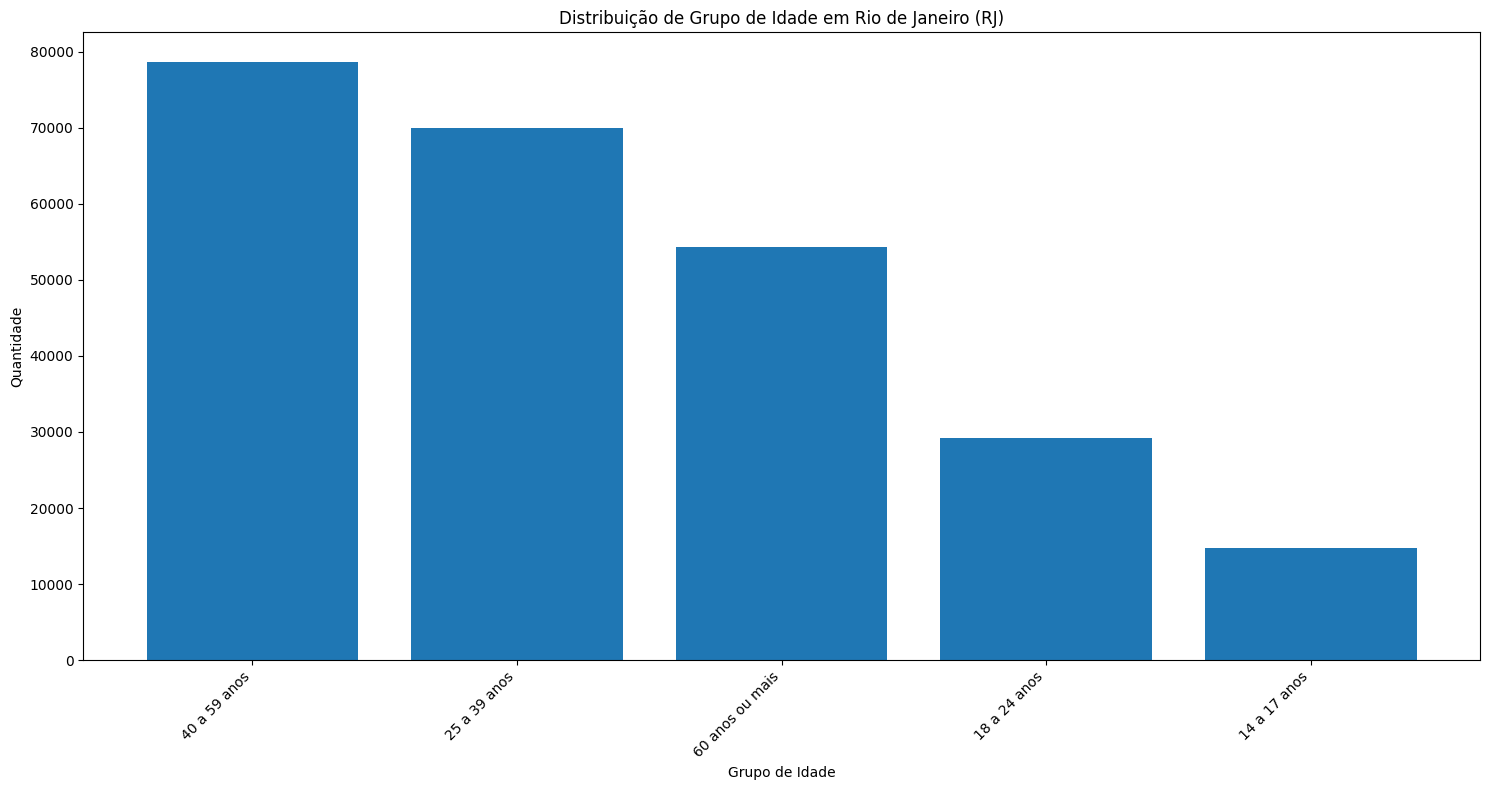

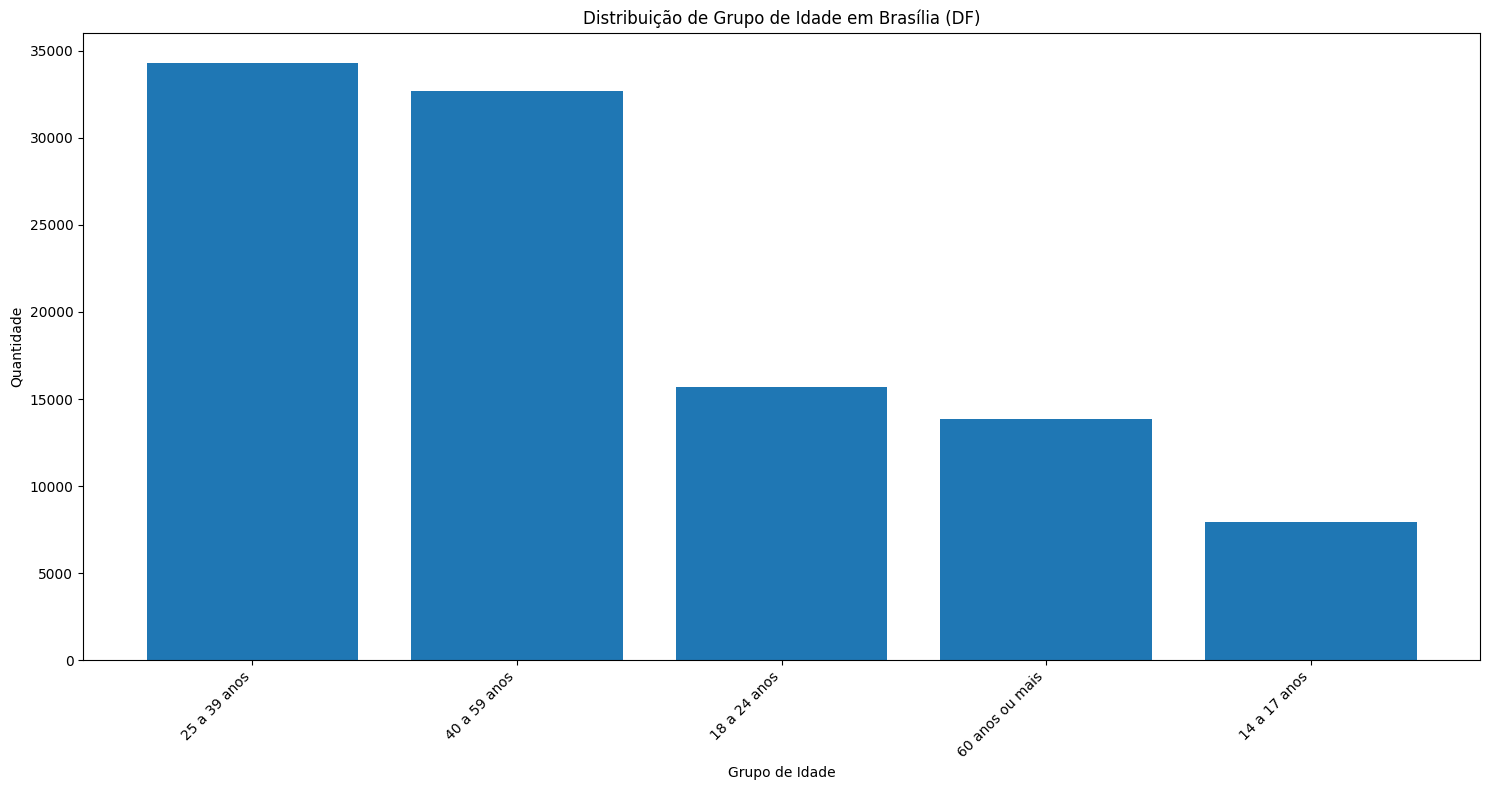

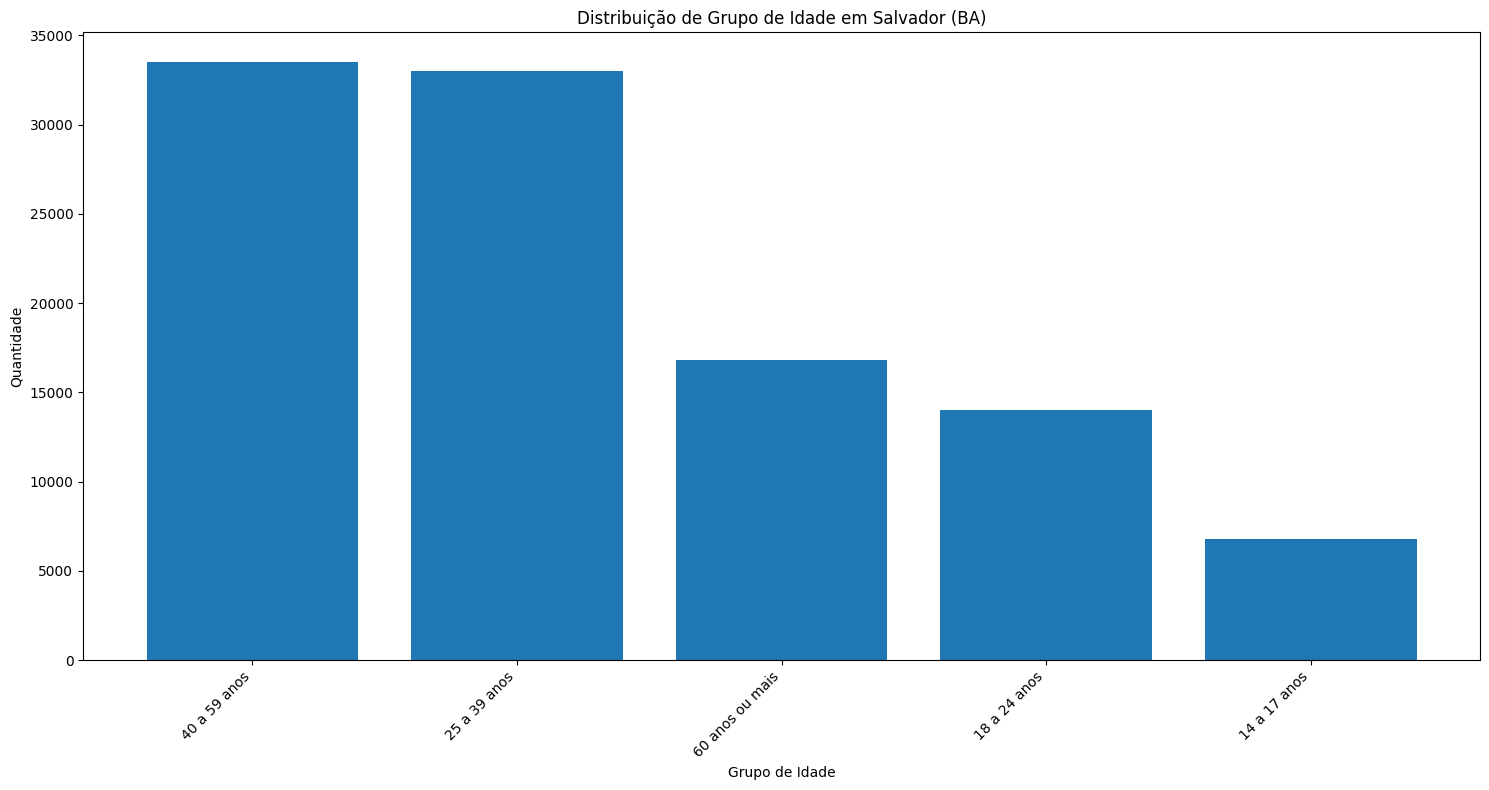

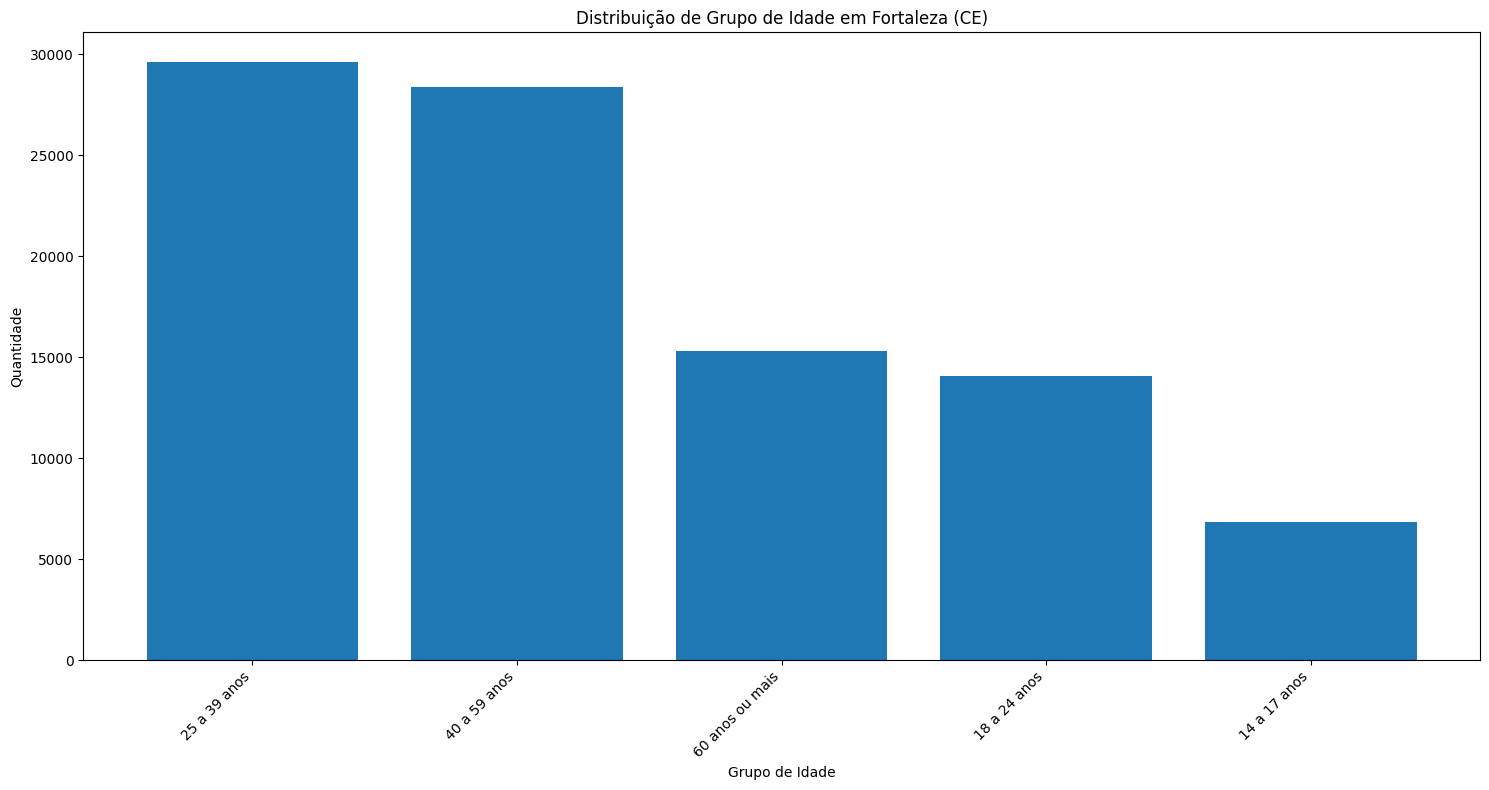

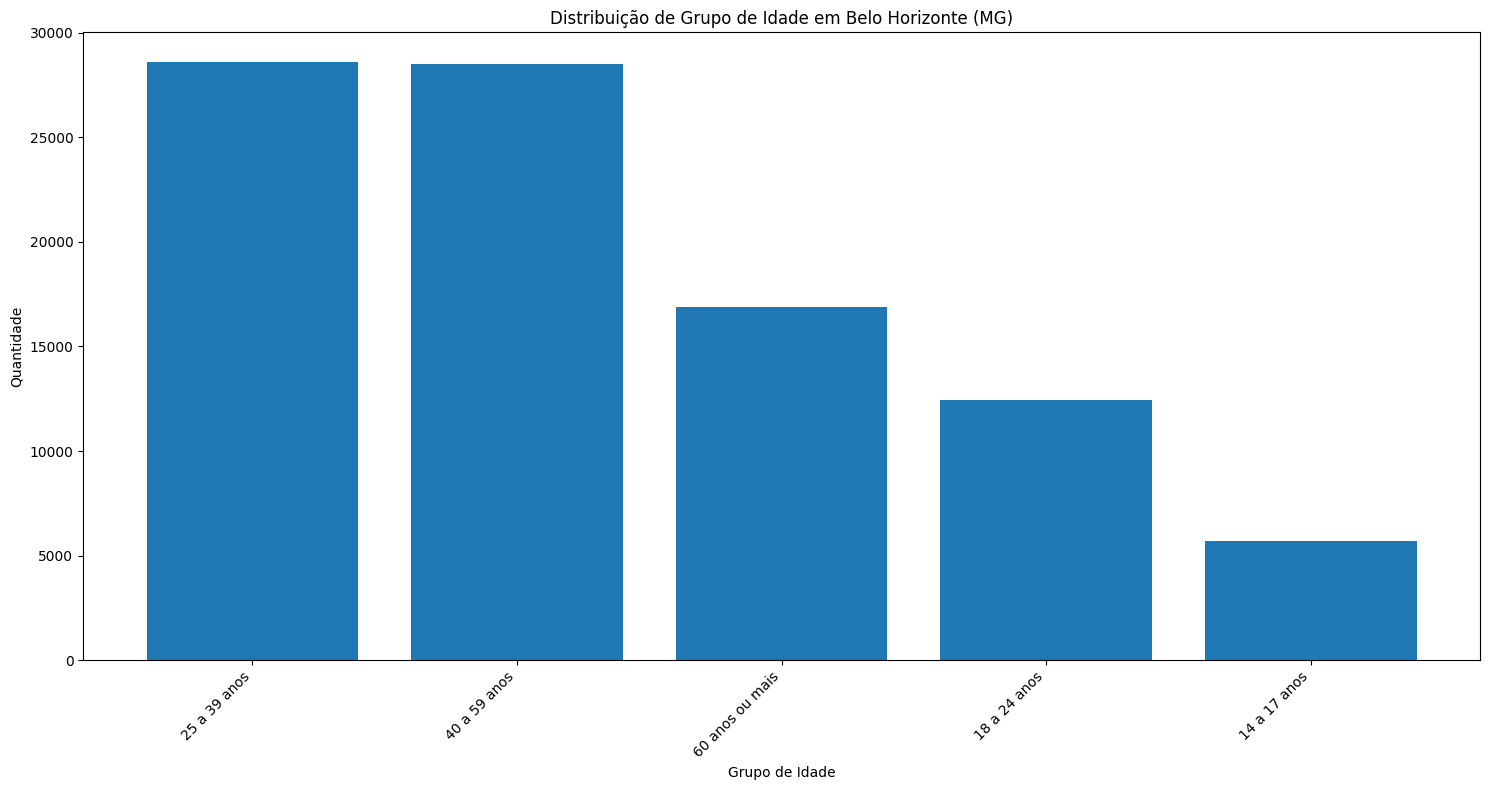

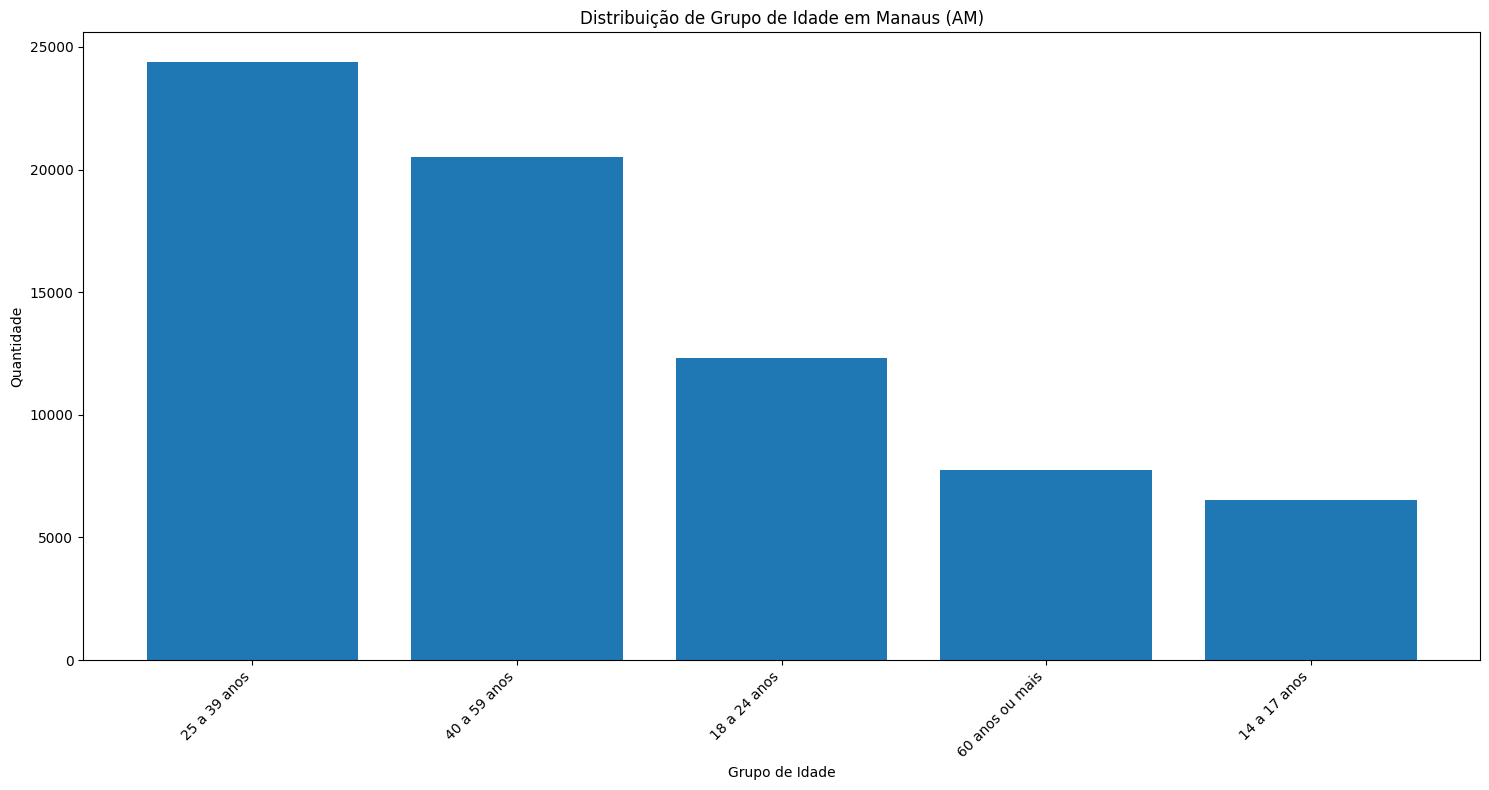

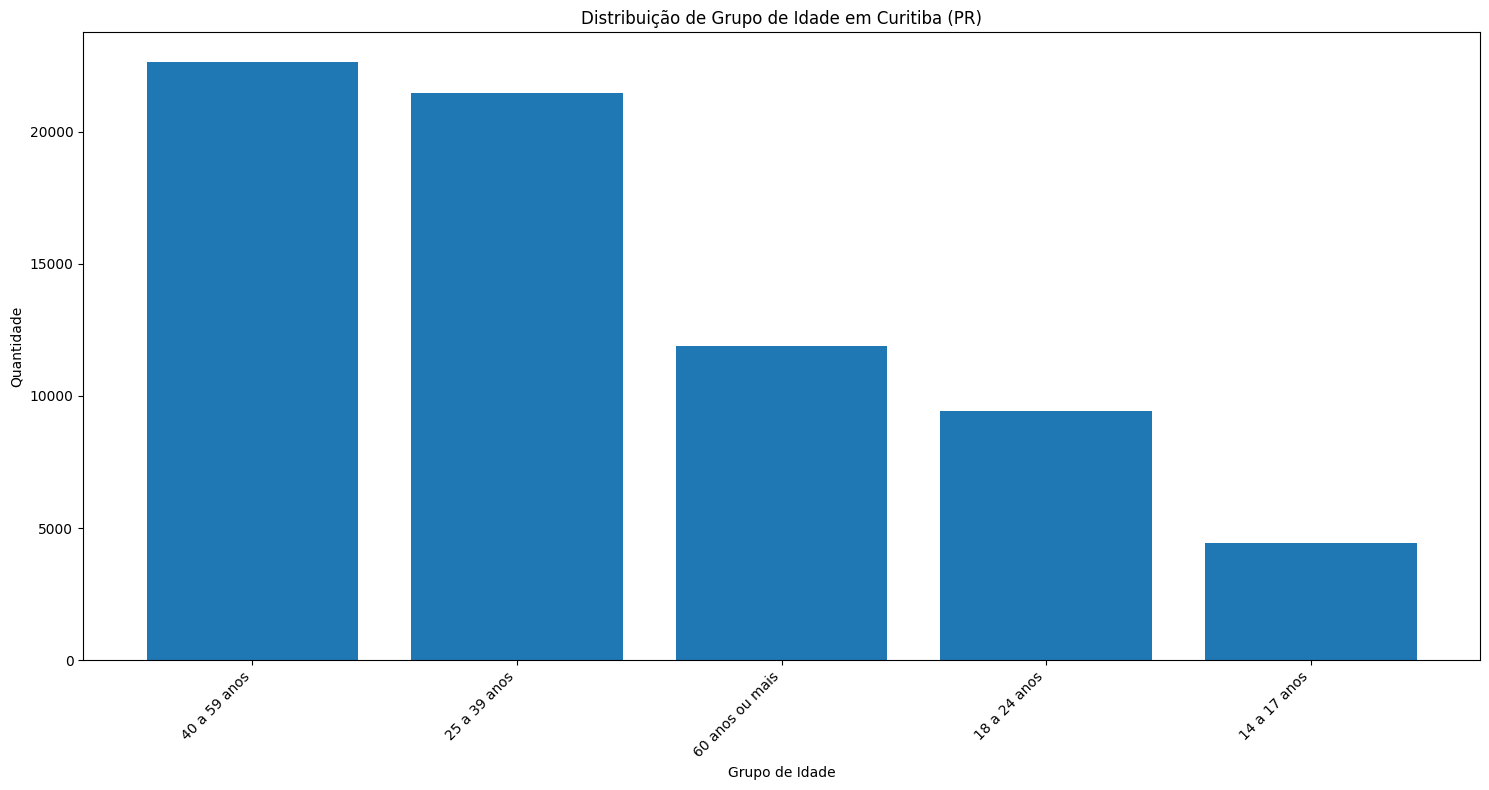

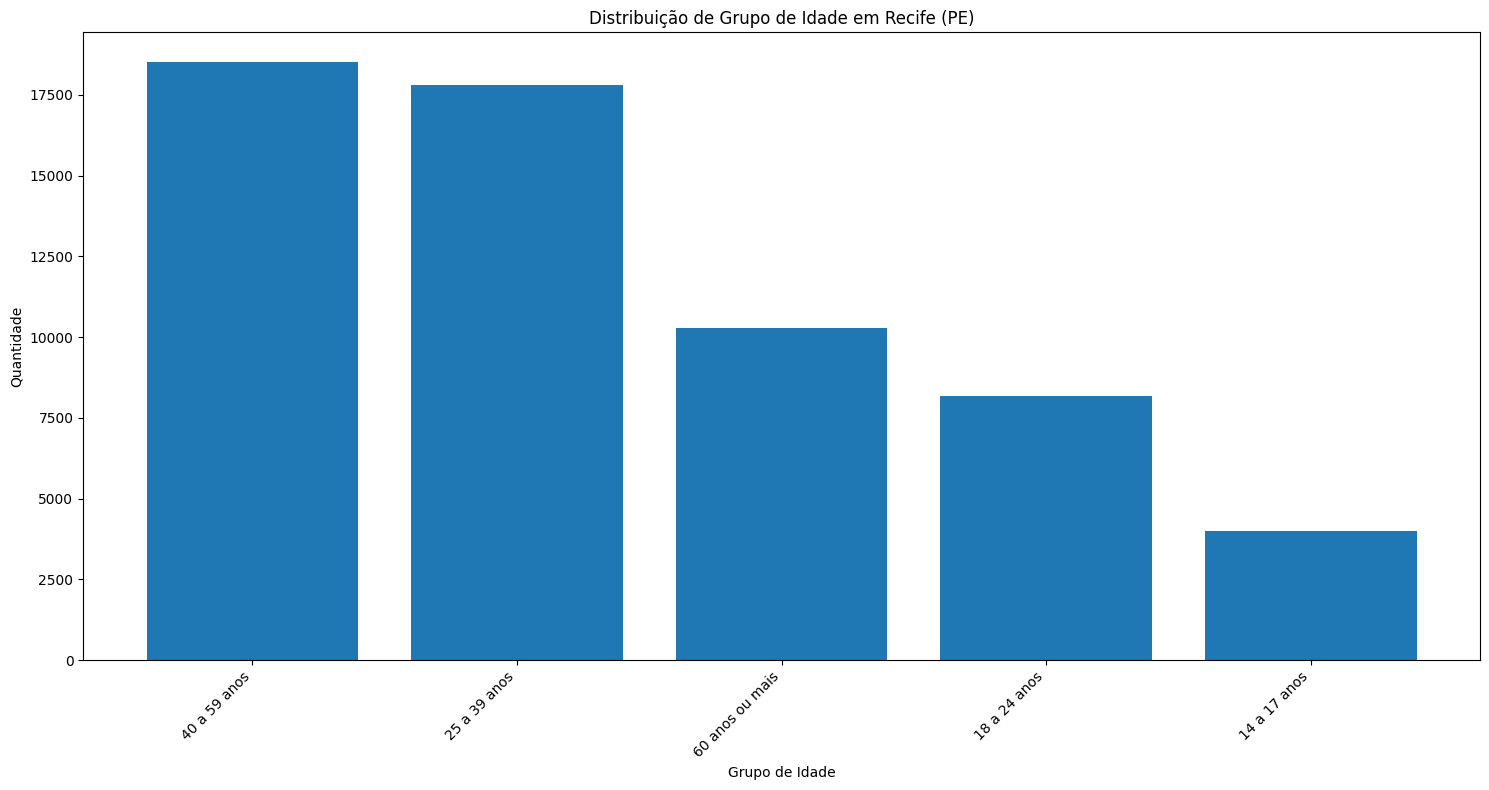

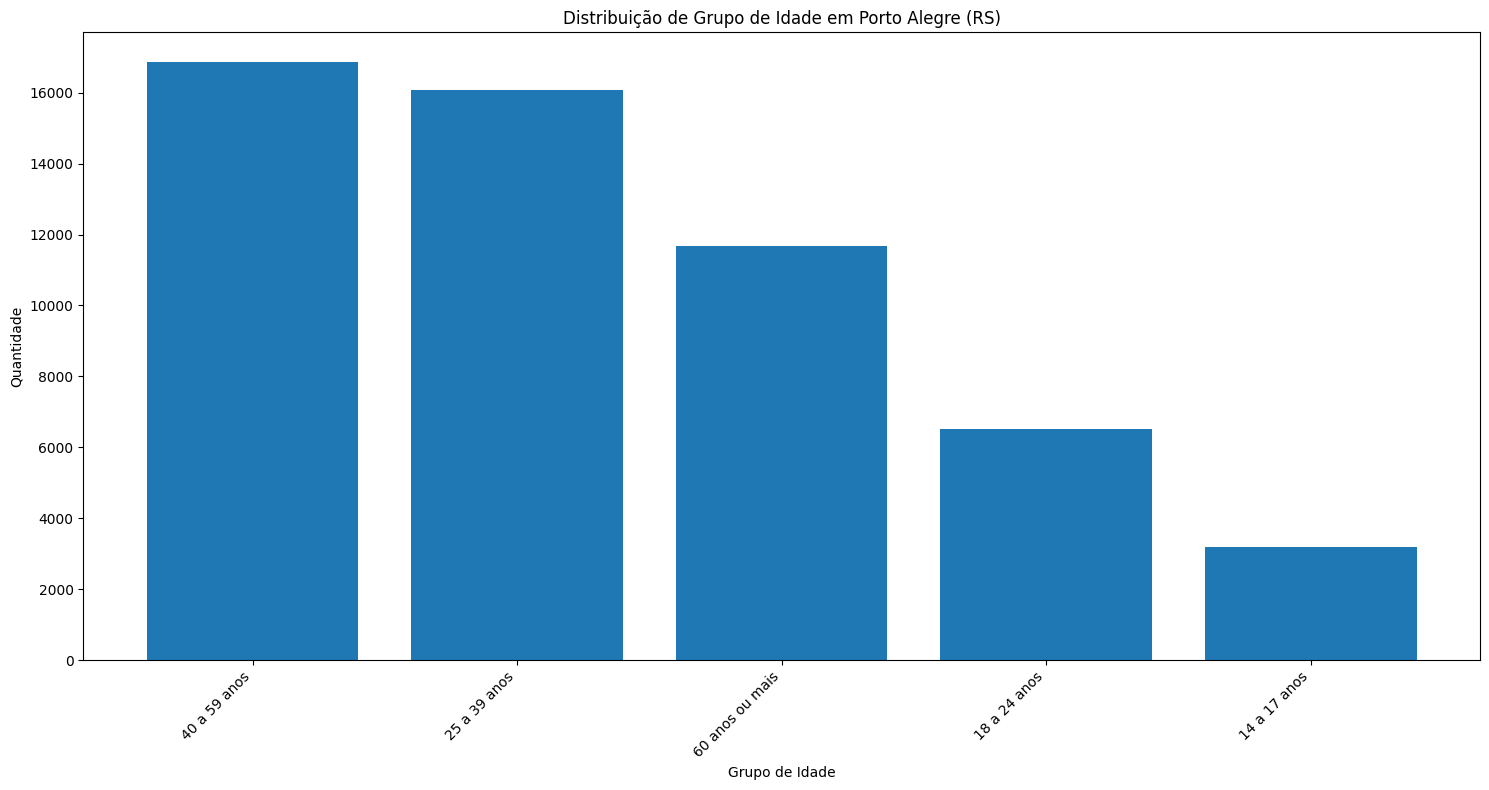

In [ ]:
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
maiores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=False).head(10)['municipio'].tolist()

for municipio in maiores_ofensores:
    dados_municipio = tabela[tabela['municipio'] == municipio]

    dados_agrupados_ocupacao = dados_municipio.groupby('Grupo de Idade')['quantidade'].sum().reset_index()

    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    # Cria o gráfico de barras
    plt.figure(figsize=(15, 8))
    plt.bar(dados_agrupados_ocupacao['Grupo de Idade'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Grupo de Idade')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Grupo de Idade em {municipio}')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()

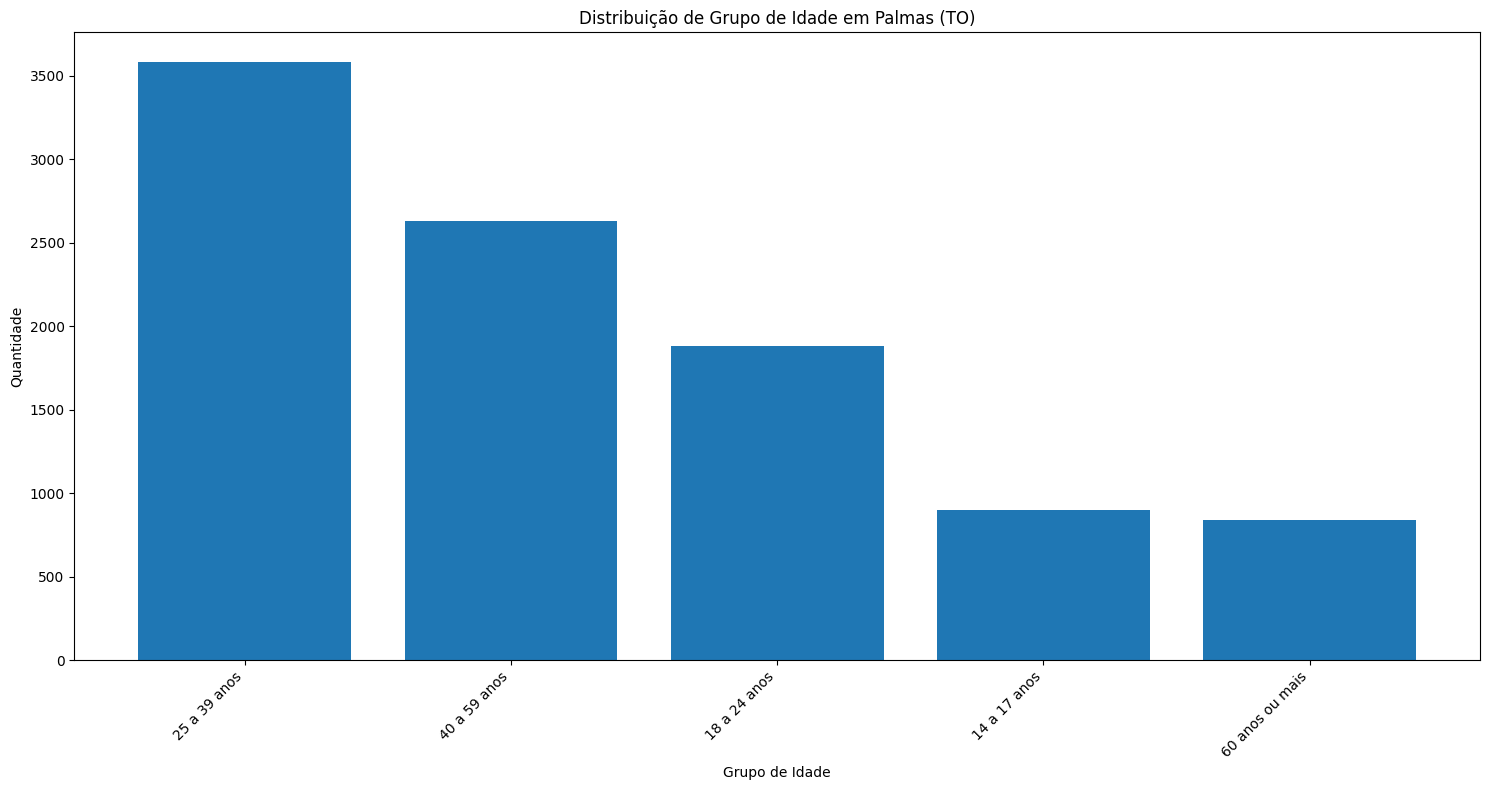

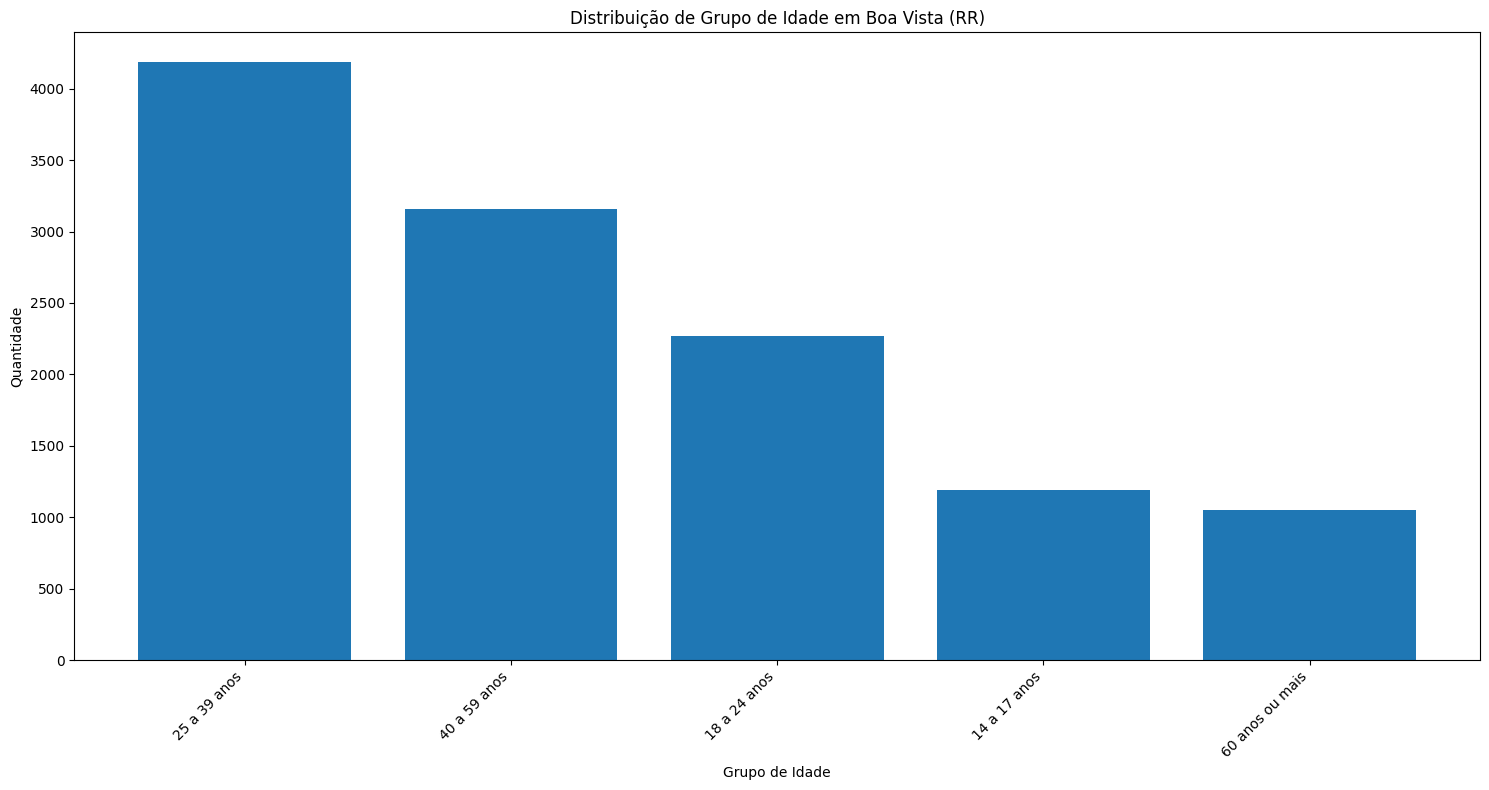

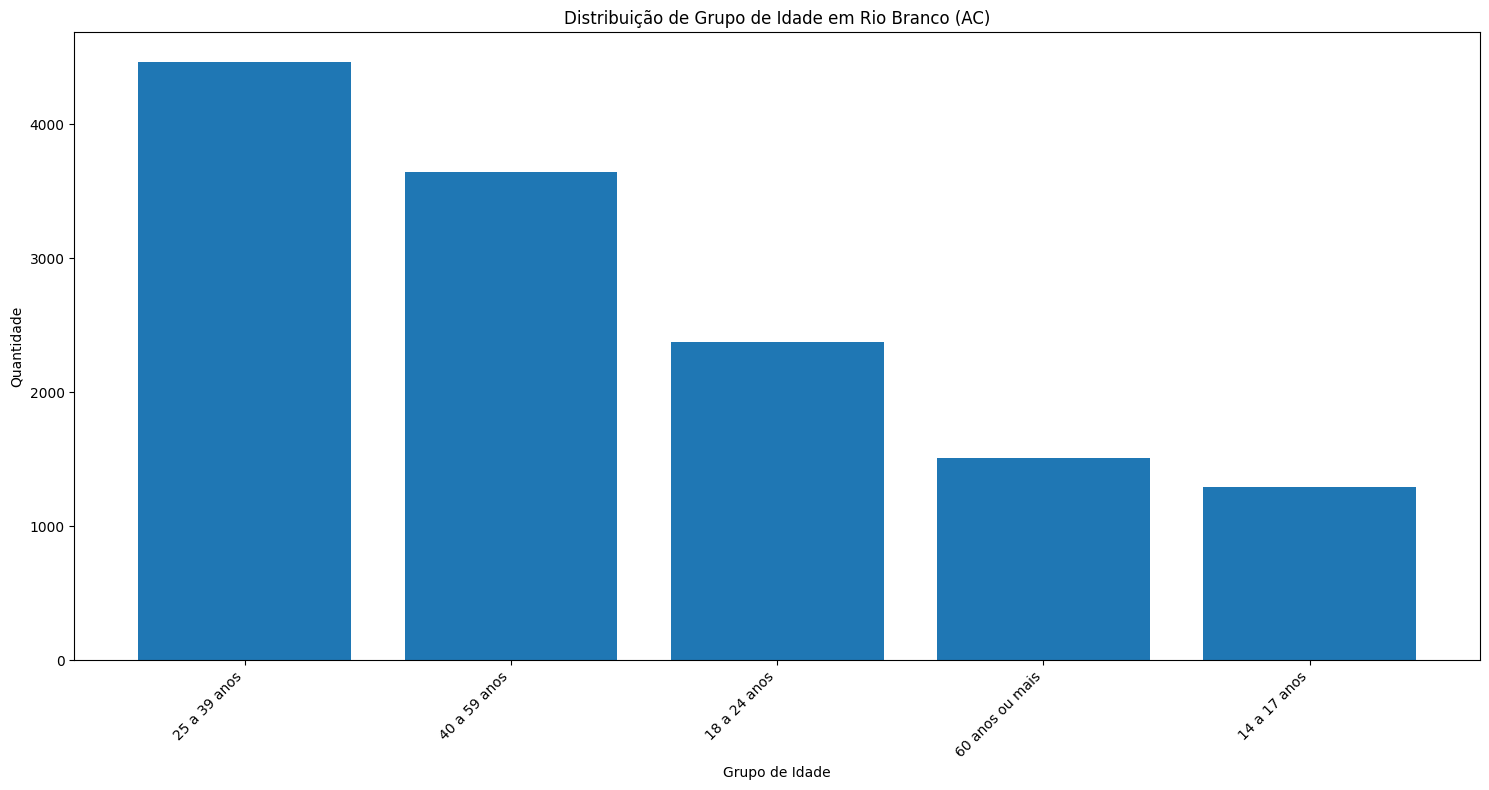

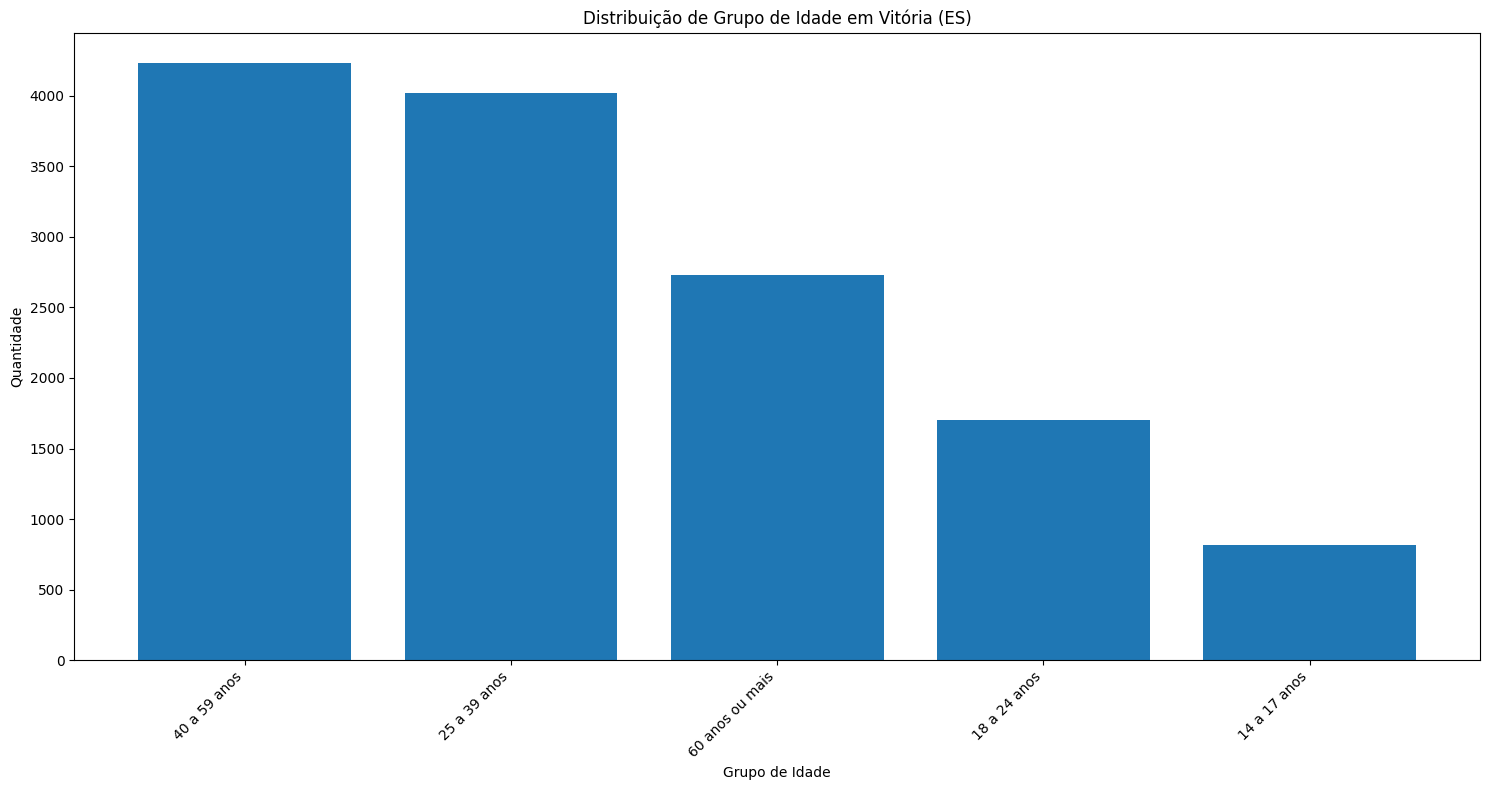

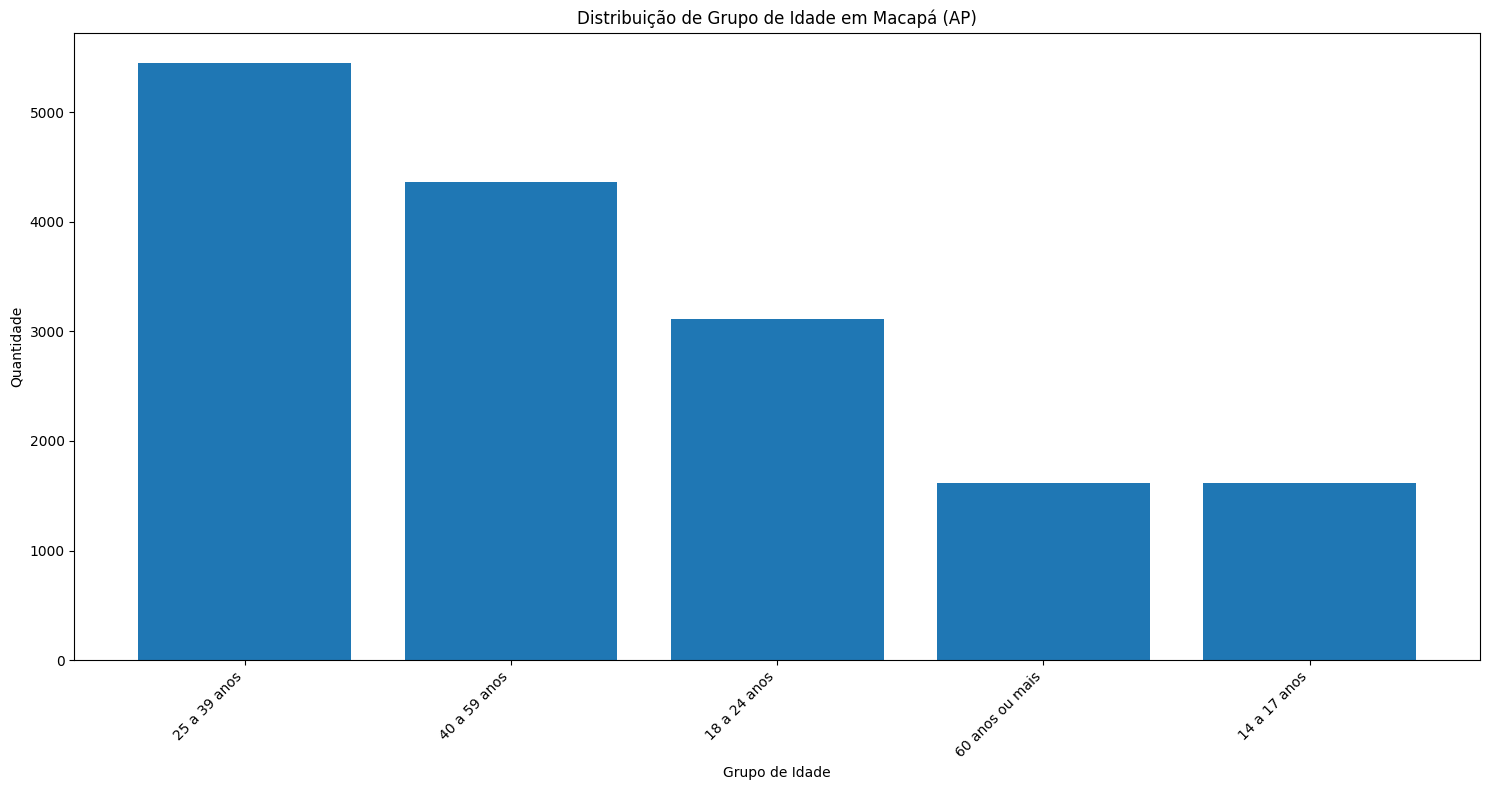

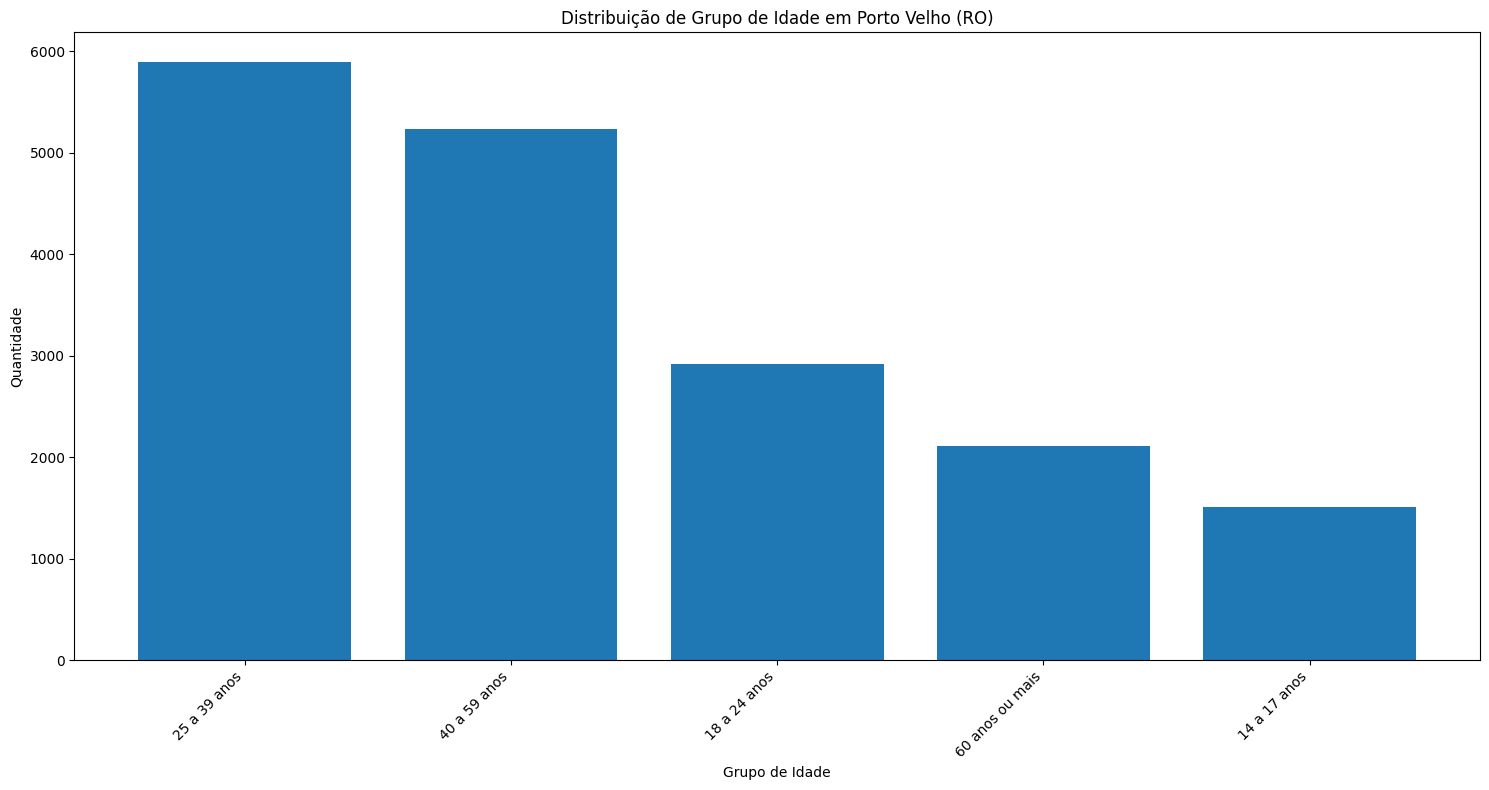

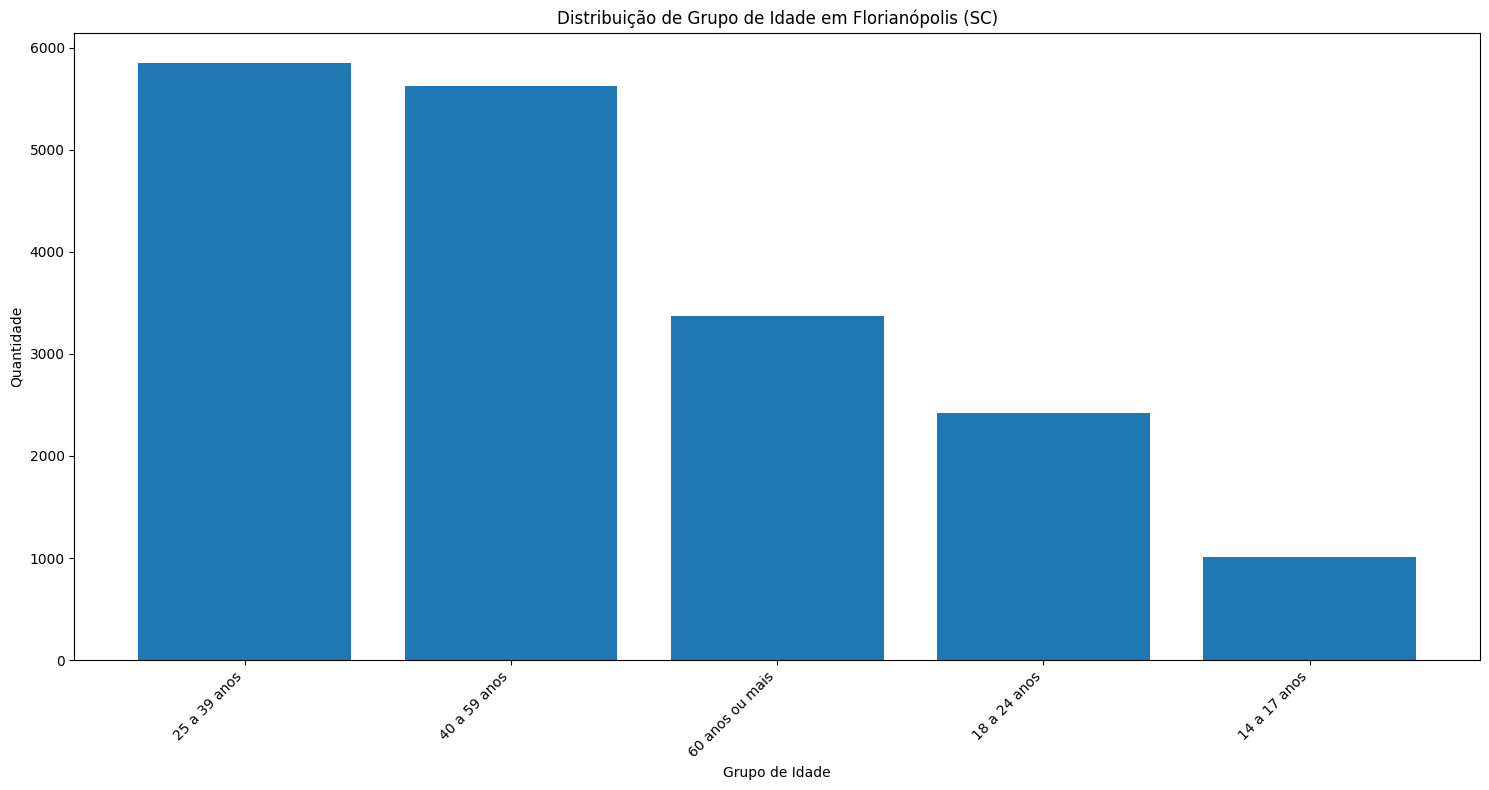

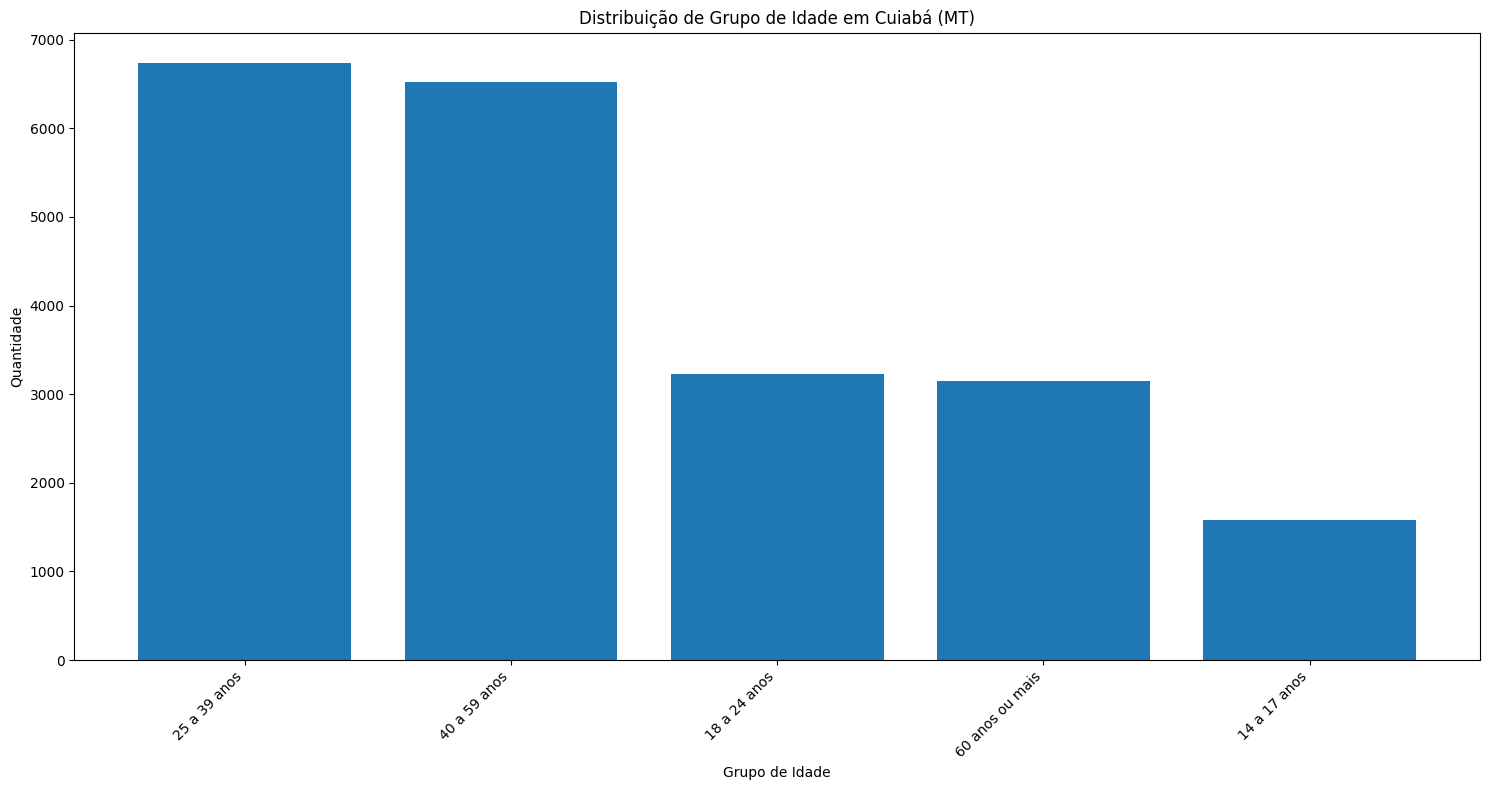

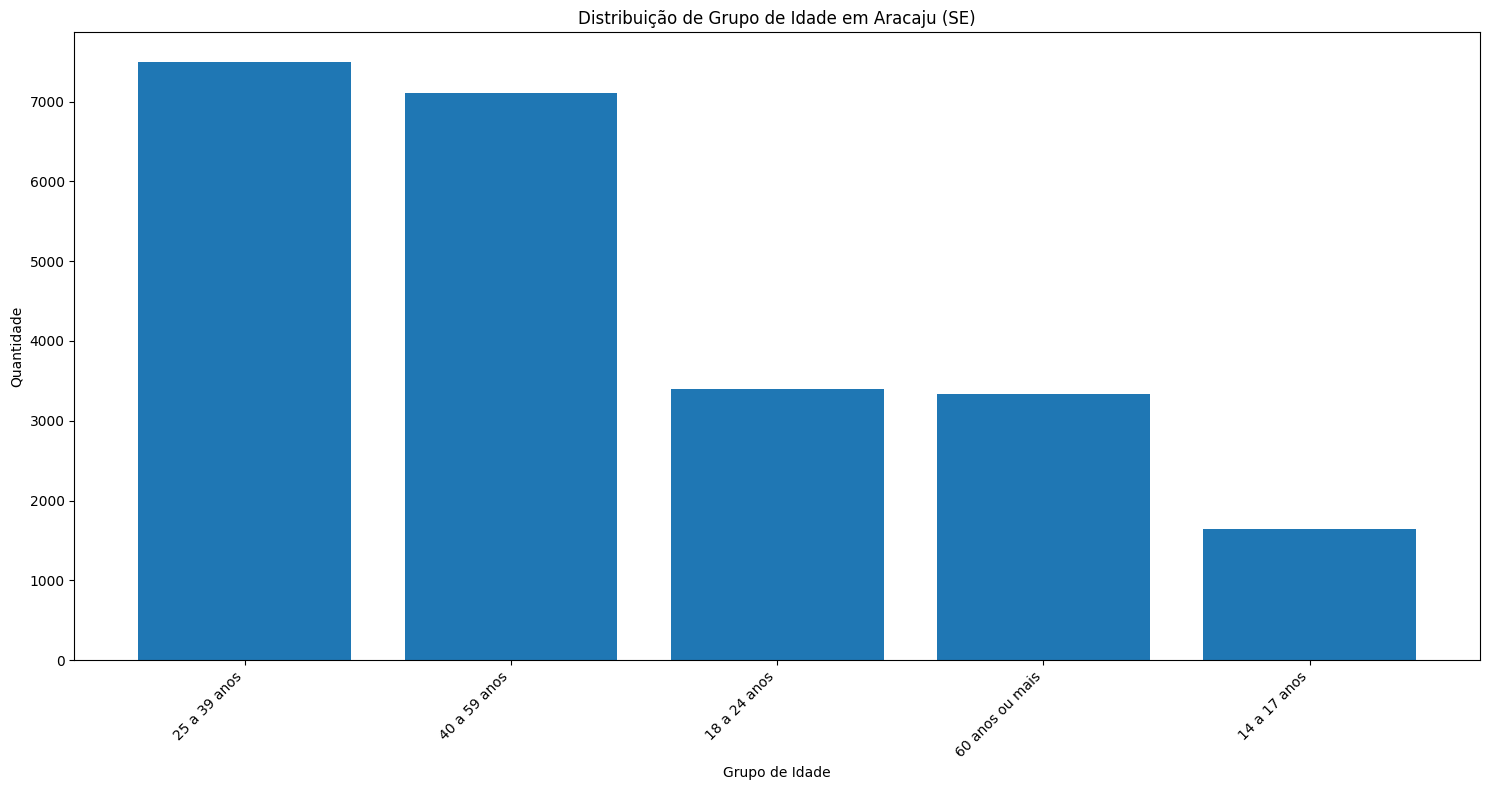

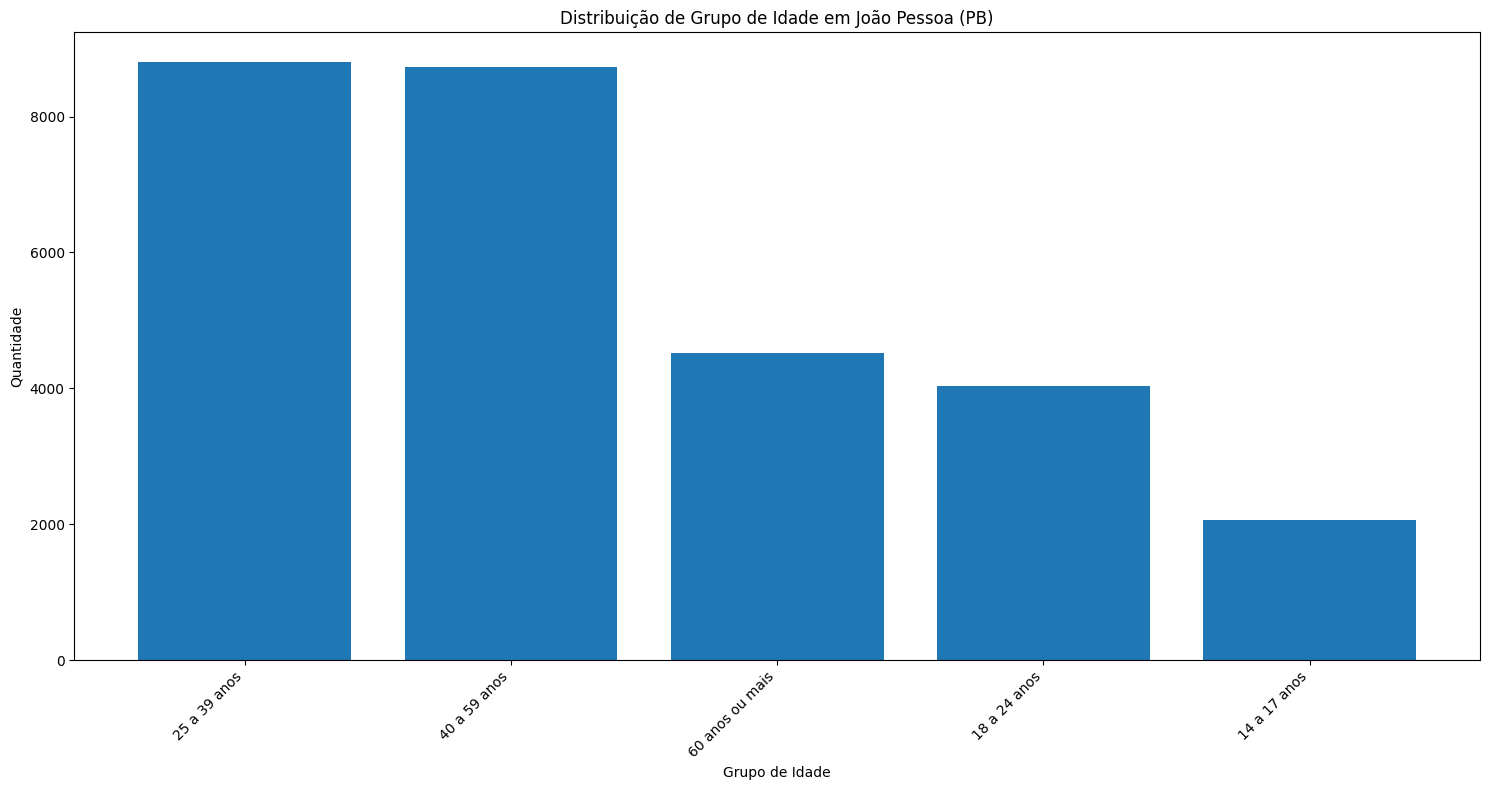

In [ ]:
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
menores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=True).head(10)['municipio'].tolist()  # ascending=True para ordem crescente

for municipio in menores_ofensores:
    dados_municipio = tabela[tabela['municipio'] == municipio]

    dados_agrupados_ocupacao = dados_municipio.groupby('Grupo de Idade')['quantidade'].sum().reset_index()

    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    plt.figure(figsize=(15, 8))
    plt.bar(dados_agrupados_ocupacao['Grupo de Idade'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Grupo de Idade')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Grupo de Idade em {municipio}')
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()  
    plt.show()